## HW3

#### Joshua Hummell Scott Reed

We load the edges of a truncated Wikispeedia edge data set from [Stanford's SNAP](https://snap.stanford.edu/data/wikispeedia.html).

In [1]:
import matplotlib.pyplot as plt
import collections
import os

This dataset contains human navigation paths on Wikipedia, collected through the human-computation game Wikispeedia. In Wikispeedia, users are asked to navigate from a given source to a given target article, by only clicking Wikipedia links. A condensed version of Wikipedia (4,604 articles) is used. In addition to the navigation paths, we provide the full HTML package of this version of Wikipedia, as well as all articles in plaintext.

In [2]:
import networkx as nx
G= nx.read_edgelist("links.tsv", "#", "\t")

In [3]:
nx.info(G)

'Graph with 2852 nodes and 13588 edges'

We see that while we have a small number of nodes but a high degree of connection between the nodes. 

Create  basic  analysis  on  the  graph,  including  the  graph’s  diameter,  and  at  least  one  other metric  of  your  choosing.  You  may  either  code  the  functions  by  hand  (to  build  your intuition  and  insight),  or  use  functions  in  an  existing  package.

(array([1.979e+03, 3.410e+02, 1.810e+02, 9.900e+01, 5.900e+01, 5.000e+01,
        3.400e+01, 3.000e+01, 1.800e+01, 1.000e+01, 8.000e+00, 9.000e+00,
        3.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.  ,   7.35,  13.7 ,  20.05,  26.4 ,  32.75,  39.1 ,  45.45,
         51.8 ,  58.15,  64.5 ,  70.85,  77.2 ,  83.55,  89.9 ,  96.25,
        102.6 , 108.95, 115.3 , 121.65, 128.  , 134.35, 140.7 , 147.05,
        153.4 , 159.75, 166.1 , 172.45, 178.8 , 185.15, 191.5 , 197.85,
        204.2 , 210.55, 216.9 , 223.25, 229.6 , 235.95, 242.3 , 248.65,
        255.  ]),
 <BarContainer object of 40 artists>)

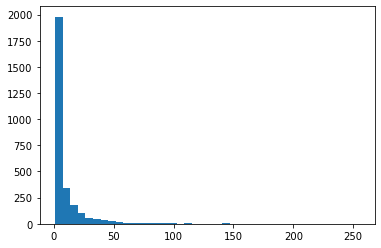

In [4]:
plt.hist([x[1] for x in G.degree()], bins=40)

We see what looks like a a pareto-esque distribution with most nodes being loosely connected, but there being a few hyper connected nodes.

In [5]:
nx.density(G)

0.0033422489488445038

Let's get the diameter

In [7]:
nx.diameter(G)

8

Now let's see if it is connected (which it assuredly will be because we are loading an edgelist)

In [8]:
nx.is_connected(G)

True

In [9]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[0:10]

[('Africa', 255),
 ('Armenia', 195),
 ('19th_century', 184),
 ('United_States', 179),
 ('Argentina', 176),
 ('21st_century', 173),
 ('Asia', 167),
 ('Atlantic_Ocean', 146),
 ('Azerbaijan', 145),
 ('Australia', 144)]

Let's get the number of nodes

In [ ]:
nx.number_of_nodes(G)

Number of edges

In [ ]:
nx.number_of_edges(G)

Now, Let's see what it looks like

In [27]:
def filter_edge(n1, n2):
    #print(n1,n2)
    return "Beer" == n2 or "Beer" == n1

view = nx.subgraph_view(G, filter_edge=filter_edge)
subGraph = nx.Graph(view)
subGraph.remove_nodes_from(list(nx.isolates(subGraph)))
subGraph.edges()
nx.info(subGraph)

'Graph with 59 nodes and 58 edges'

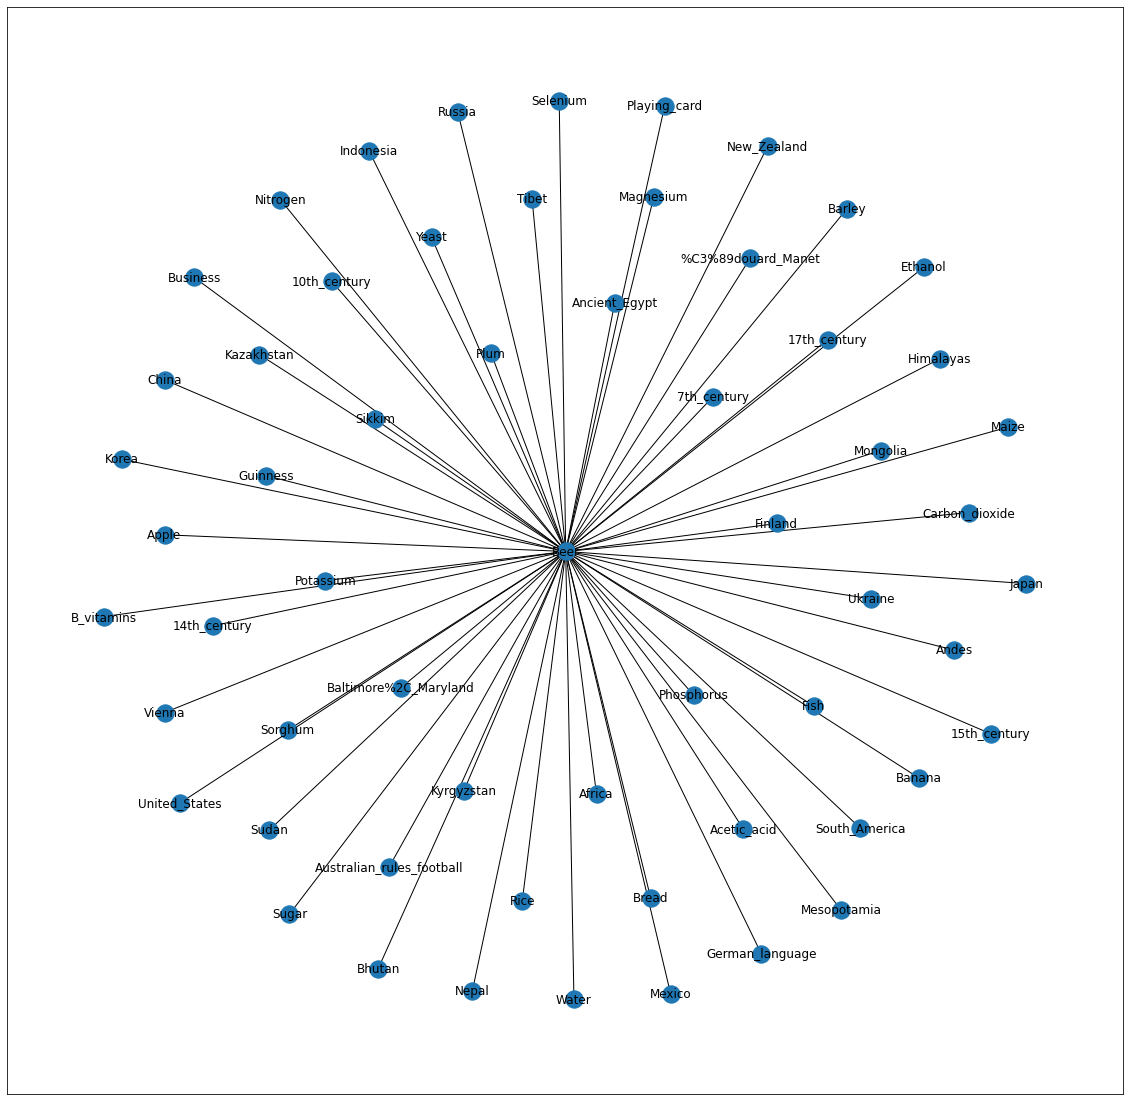

In [28]:
f = plt.figure(figsize=(20,20))
f.tight_layout()
nx.draw_networkx(subGraph)
plt.show()

Using subgraph an a loop, we can generate graphs for each connected component of the graph defined. Since it is connected, there is no real point in doing this other than to show that we can.

In [ ]:
subs_graphs = list(G.subgraph(c).copy() for c in nx.connected_components(G))

In [ ]:
f = plt.figure(figsize=(20,20))
f.tight_layout()
nx.draw_networkx(subs_graphs[0])

In [ ]:
nx.write_gexf(subs_graphs[0], os.getcwd()+'/assignment_three_graph.gexf')